# Obtenha os dados

Faça o download do dataset e extraia o arquivo .csv.

In [1]:
import datautils as du 
du.fetch_phishing_data()

[INFO] extrating all files...
[INFO] done!


# Explore os dados

Carregue os dados do arquivo .csv em um objeto DataFrame e mostre os primeiros cinco datapoints.

In [2]:
phishing = du.load_phishing_data()
phishing.head(10)

,SFH,popUpWidnow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain,having_IP_Address,Result
0,1,-1,1,-1,-1,1,1,1,0,0
1,-1,-1,-1,-1,-1,0,1,1,1,1
2,1,-1,0,0,-1,0,-1,1,0,1
3,1,0,1,-1,-1,0,1,1,0,0
4,-1,-1,1,-1,0,0,-1,1,0,1
5,-1,-1,1,-1,-1,1,0,-1,0,1
6,1,-1,0,1,-1,0,0,1,0,-1
7,1,0,1,1,0,0,0,1,1,-1
8,-1,-1,0,-1,-1,-1,-1,1,0,0
9,-1,0,-1,-1,1,1,0,-1,0,1


Obtenha uma descrição rápida do dataset.

In [3]:
phishing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1353 entries, 0 to 1352
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   SFH                1353 non-null   int64
 1   popUpWidnow        1353 non-null   int64
 2   SSLfinal_State     1353 non-null   int64
 3   Request_URL        1353 non-null   int64
 4   URL_of_Anchor      1353 non-null   int64
 5   web_traffic        1353 non-null   int64
 6   URL_Length         1353 non-null   int64
 7   age_of_domain      1353 non-null   int64
 8   having_IP_Address  1353 non-null   int64
 9   Result             1353 non-null   int64
dtypes: int64(10)
memory usage: 105.8 KB


Mostre um resumo dos atributos do dataset.

In [4]:
phishing.describe()

,SFH,popUpWidnow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain,having_IP_Address,Result
count,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000
mean,0.237990,-0.258684,0.327421,-0.223208,-0.025129,0.000000,-0.053215,0.219512,0.114560,-0.113821
std,0.916389,0.679072,0.822193,0.799682,0.936262,0.806776,0.762552,0.975970,0.318608,0.954773
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000
25%,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-1.000000
75%,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Obtenha o número de instâncias em cada classe.

In [5]:
import pandas as pd
pd.DataFrame.from_dict(phishing["Result"].value_counts())

,Result
-1,702
1,548
0,103


<AxesSubplot:xlabel='Result', ylabel='count'>

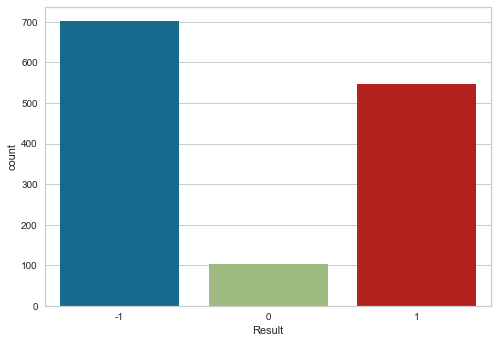

In [6]:
import seaborn as sns
sns.countplot(phishing['Result'])

Desenhe um histograma para cada um dos atributos.

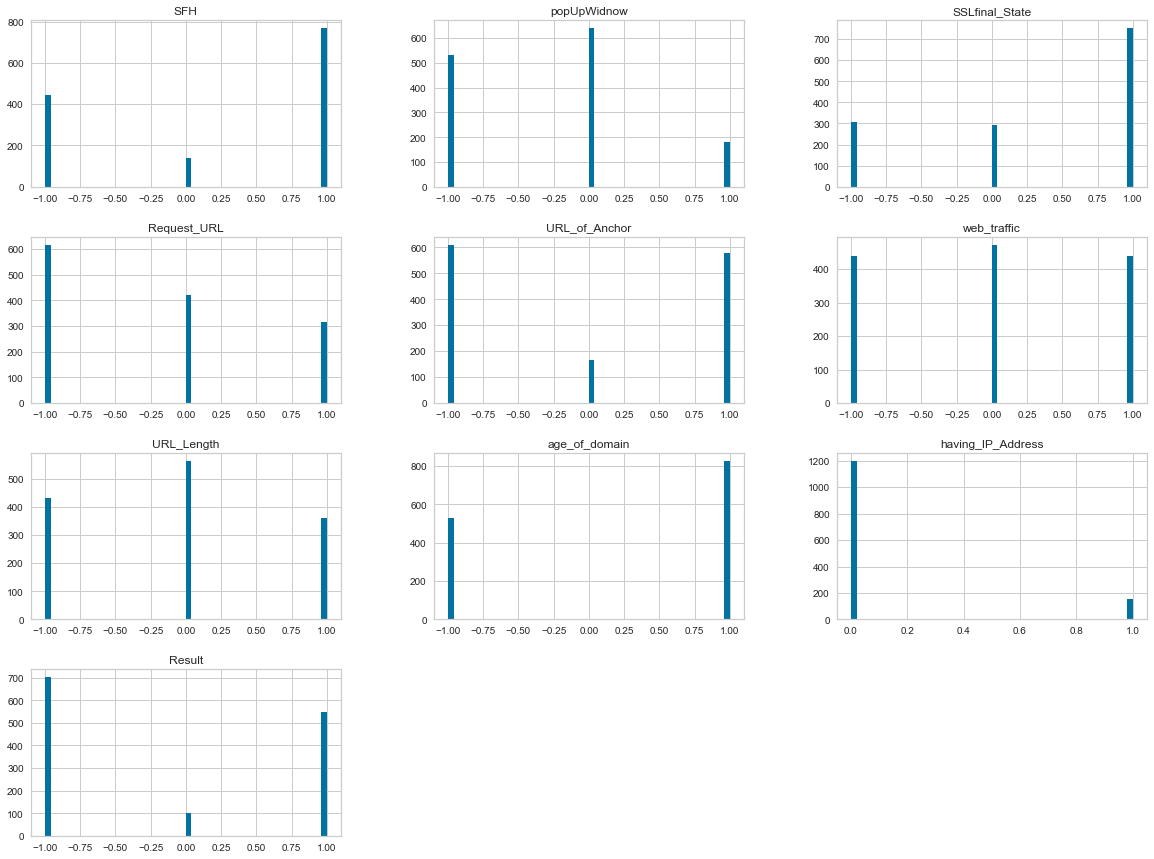

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
phishing.hist(bins=50, figsize=(20, 15))
plt.show()

Procure por correlações.

In [8]:
corr_mx = phishing.corr()
corr_mx["Result"].sort_values(ascending=False)

Result               1.000000
web_traffic          0.243896
having_IP_Address   -0.059225
URL_Length          -0.183061
age_of_domain       -0.231931
Request_URL         -0.271609
URL_of_Anchor       -0.287007
popUpWidnow         -0.509749
SSLfinal_State      -0.518762
SFH                 -0.678277
Name: Result, dtype: float64

# Prepare os dados

Crie um test set.

In [9]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(phishing, test_size=0.2, random_state=42)

In [10]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(phishing, phishing["Result"]):
    strat_train_set = phishing.loc[train_index]
    strat_test_set = phishing.loc[test_index]

Compare as proporções do dataset original com as propoções dos datasets gerados.

In [11]:
strat_train_set["Result"].value_counts() / len(strat_train_set)

-1    0.519409
 1    0.404806
 0    0.075786
Name: Result, dtype: float64

In [12]:
strat_test_set["Result"].value_counts() / len(strat_test_set)

-1    0.516605
 1    0.405904
 0    0.077491
Name: Result, dtype: float64

In [13]:
phishing["Result"].value_counts() / len(phishing)

-1    0.518847
 1    0.405026
 0    0.076127
Name: Result, dtype: float64

Divida o dataset em features e labels.

In [14]:
X_train = strat_train_set.drop("Result", axis=1)
y_train = strat_train_set["Result"].copy()

X_test = strat_test_set.drop("Result", axis=1)
y_test = strat_test_set["Result"].copy()

# Treine os modelos

## Support vector machine

Treine o classificador SVM.

In [15]:
from sklearn.svm import SVC
svm_clf = SVC(random_state=42)
svm_clf.fit(X_train, y_train)

SVC(random_state=42)

Realize algumas previsões com o classificador SVM.

In [16]:
some_website = list(X_train.iloc[4][:])
print(f"Prediction: {svm_clf.predict([some_website])}")
print(f"Ground-truth label: {y_train.iloc[4]}")

Prediction: [-1]
Ground-truth label: -1


Extraia informações relacionadas aos scores e classes do classificador.

In [17]:
import numpy as np

some_website_scores = svm_clf.decision_function([some_website])
print(f"Scores: {some_website_scores}")
print(f"Highest score: {np.argmax(some_website_scores)}")
print(f"Classes: {svm_clf.classes_}")
index = np.argmax(some_website_scores)
print(f"Classe related to index: {svm_clf.classes_[index]}")

Scores: [[ 2.20402022 -0.15733219  0.86463211]]
Highest score: 0
Classes: [-1  0  1]
Classe related to index: -1


Force o scikit-learn a usar o método OvR (one-versus-rest) no classificador SVM.

In [18]:
from sklearn.multiclass import OneVsRestClassifier
svm_ovr_clf = OneVsRestClassifier(SVC(random_state=42))
svm_ovr_clf.fit(X_train, y_train)

OneVsRestClassifier(estimator=SVC(random_state=42))

Faça algumas previsões com o classificador SVM OvR.

In [19]:
some_website = list(X_train.iloc[2][:])
print(f"Prediction: {svm_ovr_clf.predict([some_website])}")
print(f"Ground-truth label: {y_train.iloc[2]}")
print(f"Estimators amount: {len(svm_ovr_clf.estimators_)}")

Prediction: [1]
Ground-truth label: 1
Estimators amount: 3


## Gradiente descendente estocástico (Stochastic gradient descent)

Treine um classificador SGD no website phishing dataset.

In [20]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=42)

Faça algumas previsões usando o modelo.

In [21]:
some_website = list(X_train.iloc[1][:])
print(f"Prediction: {sgd_clf.predict([some_website])}")
print(f"Ground-truth label: {y_train.iloc[1]}")
print(f"Scores: {sgd_clf.decision_function([some_website])}")

Prediction: [1]
Ground-truth label: 1
Scores: [[-6.42280055 -2.61836857  3.3285515 ]]


## Floresta aleatória (Random forest)

Treine um classificador Random Florest no website phishing dataset.

In [22]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Faça previsões usando o novo modelo.

In [23]:
some_website = X_train.iloc[0][:]
print(f"Prediction: {rf_clf.predict([some_website])}")
print(f"Ground-truth label: {y_train.iloc[0]}")

Prediction: [0]
Ground-truth label: 0


# Avalie os modelos (Accuracy, Precision, Recall e F<sub>1</sub> score)

## Support vector machine

### Support vector machine (one-versus-one)

Obtenha a acurácia, precision, recall e F<sub>1</sub> score do modelo.

In [24]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

y_test_pred_svm = cross_val_predict(svm_clf, X_test, y_test, cv=3)

svm_clf_precision = precision_score(y_test, y_test_pred_svm, average="weighted")
svm_clf_recall = recall_score(y_test, y_test_pred_svm, average="weighted")
svm_clf_f1_score = f1_score(y_test, y_test_pred_svm, average="weighted")
svm_clf_accuracy = cross_val_score(svm_clf, X_test, y_test, cv=3, scoring="accuracy")

du.print_metrics([svm_clf_precision], [svm_clf_recall], [svm_clf_f1_score])

,0
Precision,0.759253
Recall,0.822878
F₁ score,0.789753


In [25]:
du.print_accuracy(svm_clf_accuracy)

,0
1st folder,0.802198
2nd folder,0.822222
3rd folder,0.844444


### Support vector machine (one-versus-rest)

Calcule a acurácia, precision, recall e F<sub>1</sub> score do modelo.

In [26]:
y_test_pred_svm_ovr = cross_val_predict(svm_ovr_clf, X_test, y_test, cv=3)
svm_ovr_clf_precision = precision_score(y_test, y_test_pred_svm_ovr, average="weighted")
svm_ovr_clf_recall = recall_score(y_test, y_test_pred_svm_ovr, average="weighted")
svm_ovr_clf_f1_score = f1_score(y_test, y_test_pred_svm_ovr, average="weighted")
svm_ovr_clf_accuracy = cross_val_score(svm_ovr_clf, X_test, y_test, cv=3, scoring="accuracy")

du.print_metrics([svm_ovr_clf_precision], [svm_ovr_clf_recall], [svm_clf_f1_score])

,0
Precision,0.762563
Recall,0.826568
F₁ score,0.789753


In [27]:
du.print_accuracy(svm_ovr_clf_accuracy)

,0
1st folder,0.813187
2nd folder,0.822222
3rd folder,0.844444


## Gradiente descendente estocástico (stochastic gradient descent)

Calcule a acurácia, precision, recall e F<sub>1</sub> score do modelo.

In [28]:
y_test_pred_sgd_clf = cross_val_predict(sgd_clf, X_test, y_test, cv=3)
sgd_clf_precision = precision_score(y_test, y_test_pred_sgd_clf, average="weighted")
sgd_clf_recall = recall_score(y_test, y_test_pred_sgd_clf, average="weighted")
sgd_clf_f1_score = f1_score(y_test, y_test_pred_sgd_clf, average="weighted")
sgd_clf_accuracy = cross_val_score(sgd_clf, X_test, y_test, cv=3, scoring="accuracy")

du.print_metrics([sgd_clf_precision], [sgd_clf_recall], [sgd_clf_f1_score])

,0
Precision,0.778962
Recall,0.804428
F₁ score,0.785343


In [29]:
du.print_accuracy(sgd_clf_accuracy)

,0
1st folder,0.824176
2nd folder,0.800000
3rd folder,0.788889


## Floresta aleatória (Random forest)

Calcule a acurácia, precision, recall e F1 score do modelo.

In [30]:
y_test_pred_rf_clf = cross_val_predict(rf_clf, X_test, y_test, cv=3)
rf_clf_precision = precision_score(y_test, y_test_pred_rf_clf, average="micro")
rf_clf_recall = recall_score(y_test, y_test_pred_rf_clf, average="micro")
rf_clf_f1_score = f1_score(y_test, y_test_pred_rf_clf, average="micro")
rf_clf_accuracy = cross_val_score(rf_clf, X_test, y_test, cv=3, scoring="accuracy")

du.print_metrics(
    [rf_clf_precision], 
    [rf_clf_recall], 
    [rf_clf_f1_score]
)

,0
Precision,0.881919
Recall,0.881919
F₁ score,0.881919


In [31]:
du.print_accuracy(rf_clf_accuracy)

,0
1st folder,0.879121
2nd folder,0.855556
3rd folder,0.911111


# Avalie os modelos (Confusion matrix e class prediction error)

## Support vector machine

### Confusion matrix (one-versus-one)

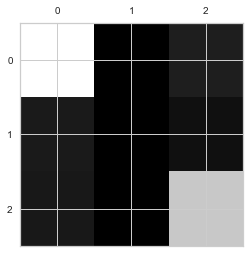

In [32]:
from sklearn.metrics import confusion_matrix

y_test_pred_svm = cross_val_predict(svm_clf, X_test, y_test, cv=3)
svm_conf_mx = confusion_matrix(y_test, y_test_pred_svm)
plt.matshow(svm_conf_mx, cmap=plt.cm.gray)

In [33]:
du.print_conf_mx(svm_conf_mx)

,TP,FP,TN,FN
phishing,125,15,106,25
suspicious,0,21,250,0
legitimate,98,12,138,23


### Class prediction error (one-versus-one)

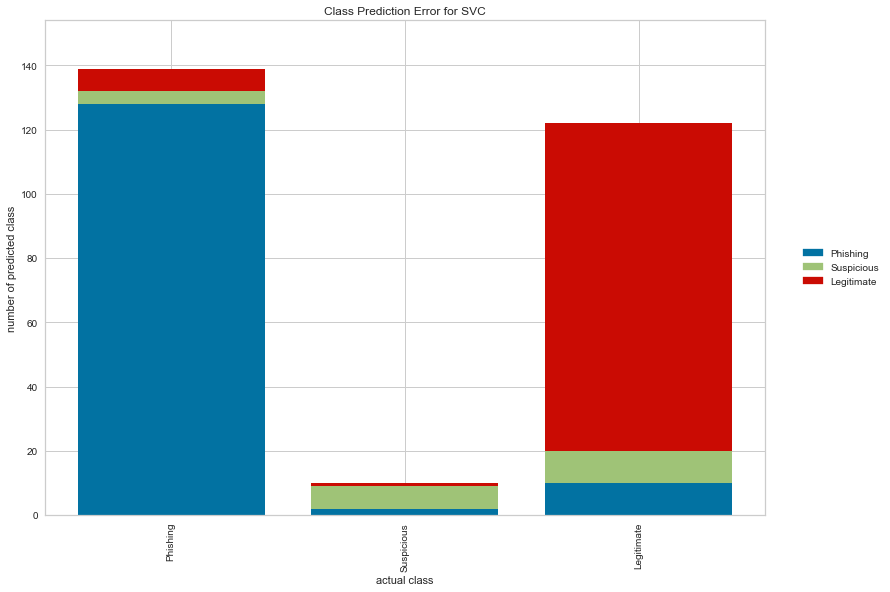

In [34]:
from yellowbrick.classifier import ClassPredictionError

svm_visualizer = ClassPredictionError(
    SVC(random_state=42), 
    classes=["Suspicious", "Legitimate", "Phishing"],
    size=(1000, 600),
)

du.show_visualizer(svm_visualizer, X_train, X_test, y_train, y_test)

### Confusion matrix (one-versus-rest)

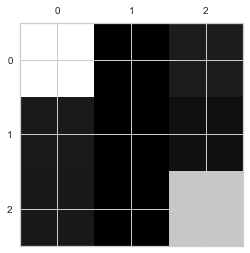

In [35]:
svm_ovr_clf_conf_mx = confusion_matrix(y_test, y_test_pred_svm_ovr)
plt.matshow(svm_ovr_clf_conf_mx, cmap=plt.cm.gray)

In [36]:
du.print_conf_mx(svm_ovr_clf_conf_mx)

,TP,FP,TN,FN
phishing,126,14,106,25
suspicious,0,21,250,0
legitimate,98,12,139,22


### Class prediction error (one-versus-rest)

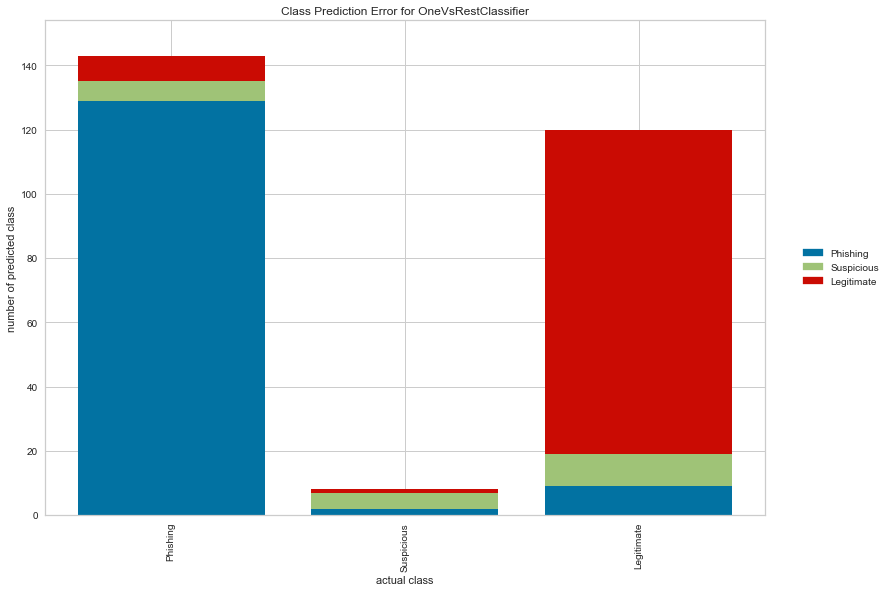

In [37]:
svm_ovr_visualizer = ClassPredictionError(
    OneVsRestClassifier(SVC(random_state=42)), 
    classes=["Suspicious", "Legitimate", "Phishing"],
    size=(1000, 600),
)

du.show_visualizer(svm_ovr_visualizer, X_train, X_test, y_train, y_test)

## Stochastic gradient descent

### Confusion matrix

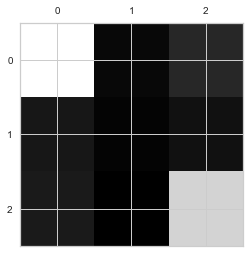

In [38]:
sgd_clf_conf_mx = confusion_matrix(y_test, y_test_pred_sgd_clf)
plt.matshow(sgd_clf_conf_mx, cmap=plt.cm.gray)

In [39]:
du.print_conf_mx(sgd_clf_conf_mx)

,TP,FP,TN,FN
phishing,118,22,108,23
suspicious,2,19,246,4
legitimate,98,12,135,26


### Class prediction error

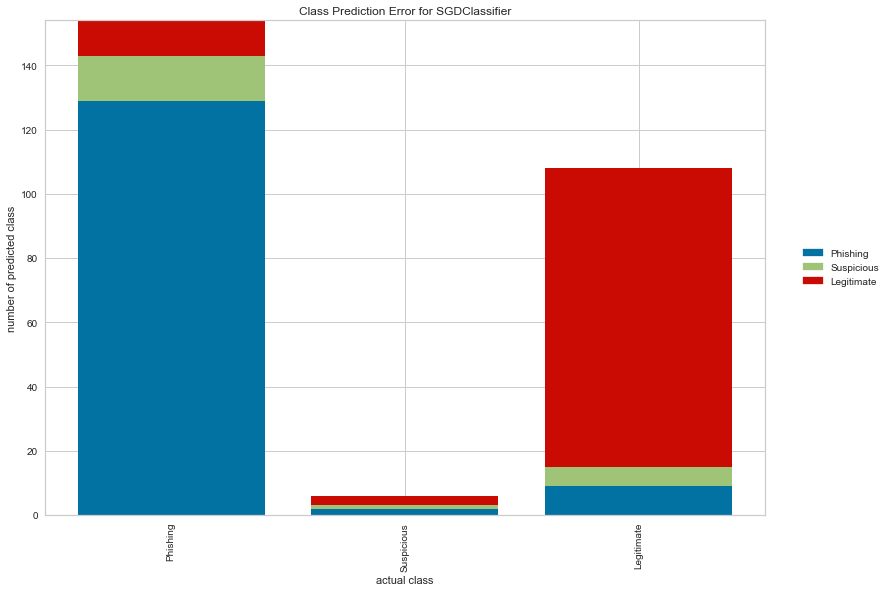

In [40]:
sgd_visualizer = ClassPredictionError(
    SGDClassifier(random_state=42), 
    classes=["Suspicious", "Legitimate", "Phishing"],
    size=(1000, 600),
)

du.show_visualizer(sgd_visualizer, X_train, X_test, y_train, y_test)

## Random forest

### Confusion matrix

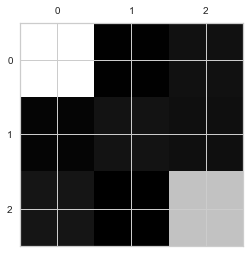

In [41]:
rf_clf_conf_mx = confusion_matrix(y_test, y_test_pred_rf_clf)
plt.matshow(rf_clf_conf_mx, cmap=plt.cm.gray)

In [42]:
du.print_conf_mx(rf_clf_conf_mx)

,TP,FP,TN,FN
phishing,130,10,117,14
suspicious,10,11,249,1
legitimate,99,11,144,17


### Class Prediction Error

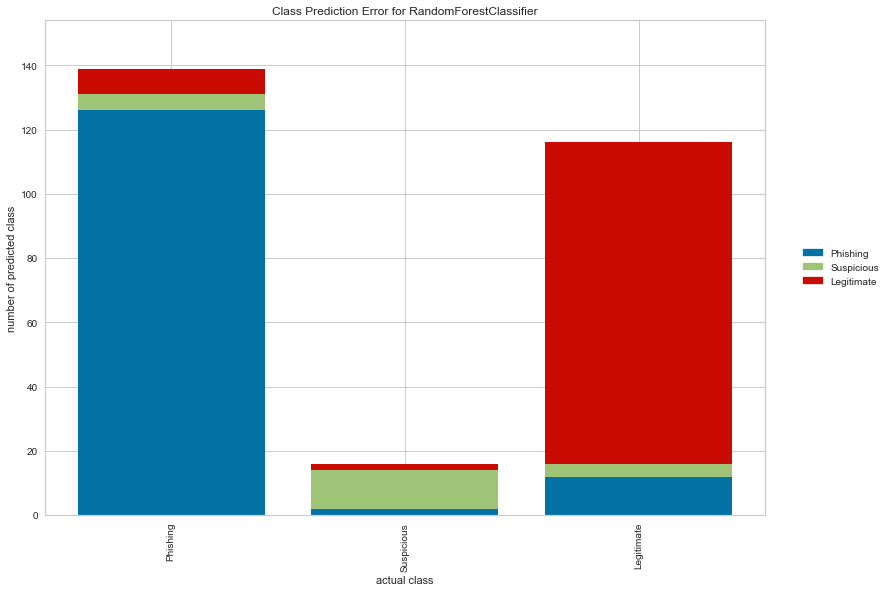

In [43]:
visualizer = ClassPredictionError(
    RandomForestClassifier(random_state=42), 
    classes=["Suspicious", "Legitimate", "Phishing"],
    size=(1000, 600),
)

du.show_visualizer(visualizer, X_train, X_test, y_train, y_test)

# Avalie os modelos (ROC AUC curve)

### Phishing class

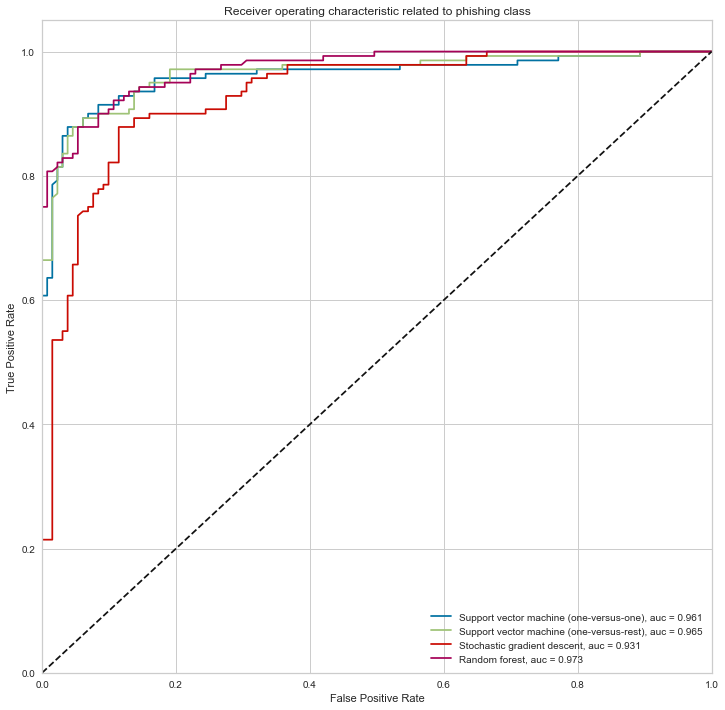

In [44]:
clfs = [svm_clf, svm_ovr_clf, sgd_clf, rf_clf]
du.plot_multiclass_roc(clfs, X_test, y_test)

### Suspicious class

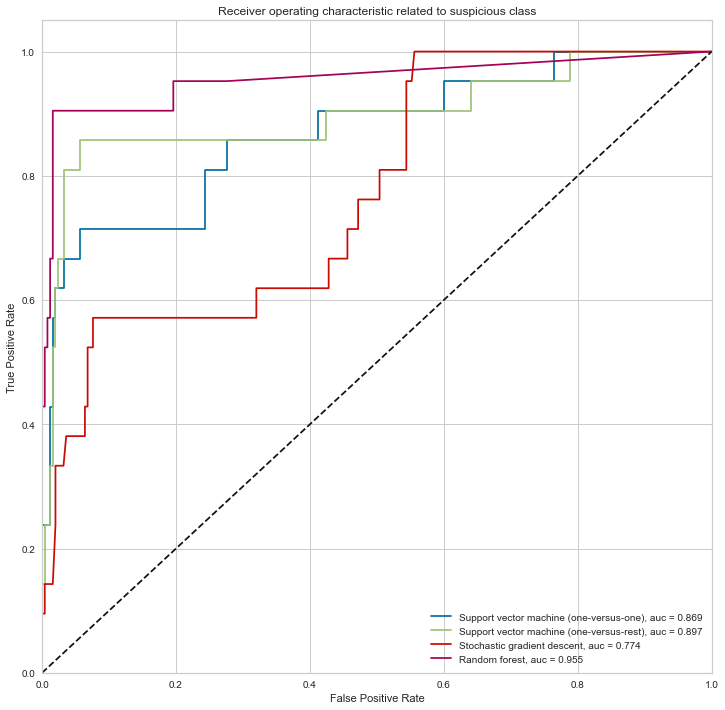

In [45]:
du.plot_multiclass_roc(clfs, X_test, y_test, class_n=1)

### Legitimate class

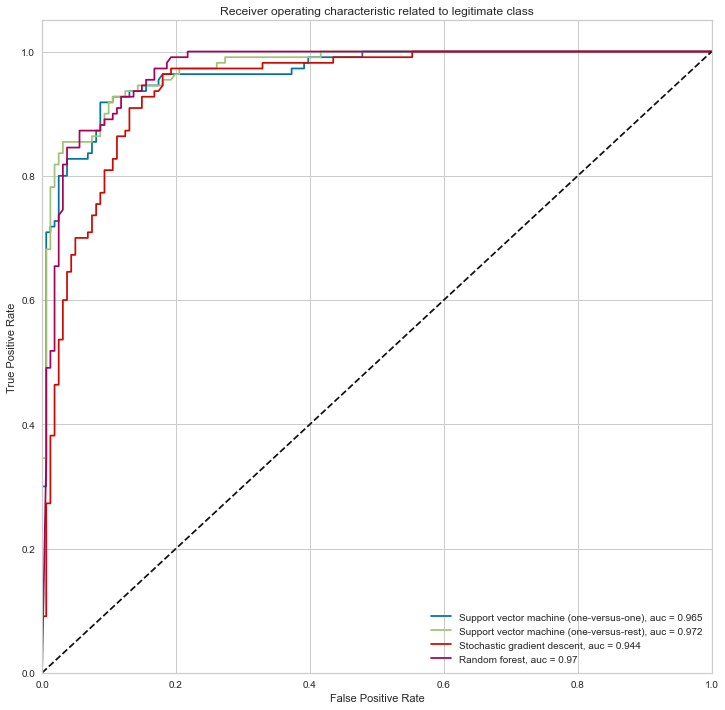

In [46]:
du.plot_multiclass_roc(clfs, X_test, y_test, class_n=2)

# Ajuste o modelo (fine-tune)

In [47]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {
        'n_estimators': [3, 10, 20, 30, 31, 50], 
        'max_features': [2, 4, 6, 8, 10, 12],
        'class_weight': ['balanced', 'balanced_subsample'],
        'criterion': ['gini', 'entropy']
    }
]

new_rf_clf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(
    new_rf_clf, param_grid, 
    cv=5, 
    scoring="neg_mean_squared_error", 
    return_train_score=True,
)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid=[{'class_weight': ['balanced', 'balanced_subsample'],
                          'criterion': ['gini', 'entropy'],
                          'max_features': [2, 4, 6, 8, 10, 12],
                          'n_estimators': [3, 10, 20, 30, 31, 50]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [48]:
grid_search.best_params_

{'class_weight': 'balanced_subsample',
 'criterion': 'gini',
 'max_features': 6,
 'n_estimators': 50}

In [49]:
fine_tuned_rf_clf = RandomForestClassifier(
    class_weight="balanced_subsample", 
    max_features=6, 
    n_estimators=50, 
    criterion="gini",
    random_state=42
)
fine_tuned_rf_clf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced_subsample', max_features=6,
                       n_estimators=50, random_state=42)

Mostre as novas métricas do modelo.

## Confusion matrix

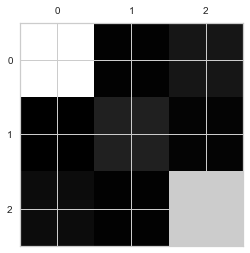

In [50]:
y_test_pred = fine_tuned_rf_clf.predict(X_test)

rf_clf_conf_mx = confusion_matrix(y_test, y_test_pred)
plt.matshow(rf_clf_conf_mx, cmap=plt.cm.gray)

In [51]:
du.print_conf_mx(rf_clf_conf_mx)

,TP,FP,TN,FN
phishing,126,14,123,8
suspicious,17,4,246,4
legitimate,101,9,146,15


## Class prediction error

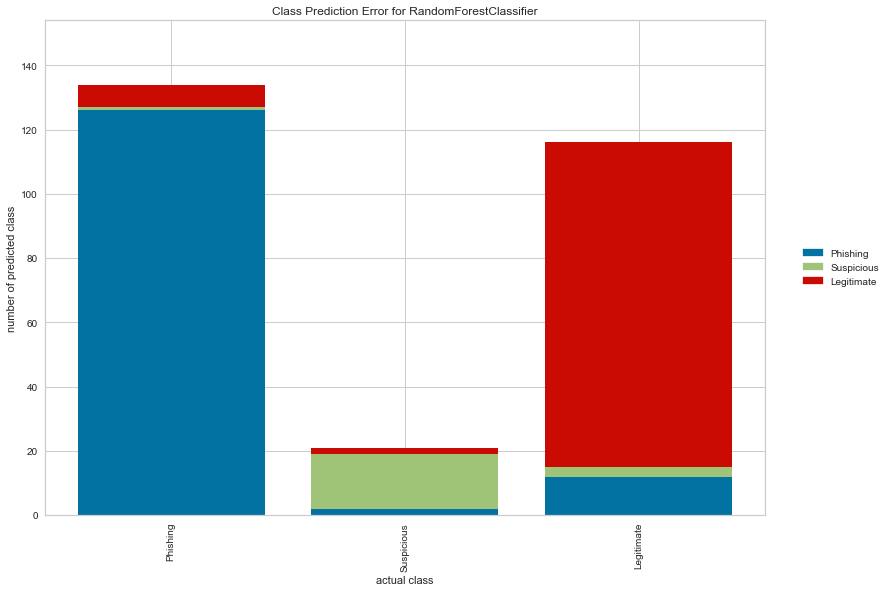

In [52]:
visualizer = ClassPredictionError(
    RandomForestClassifier(class_weight="balanced_subsample", max_features=6, n_estimators=50, random_state=42),
    classes=["Suspicious", "Legitimate", "Phishing"],
    size=(1000, 600),
)

du.show_visualizer(visualizer, X_train, X_test, y_train, y_test)

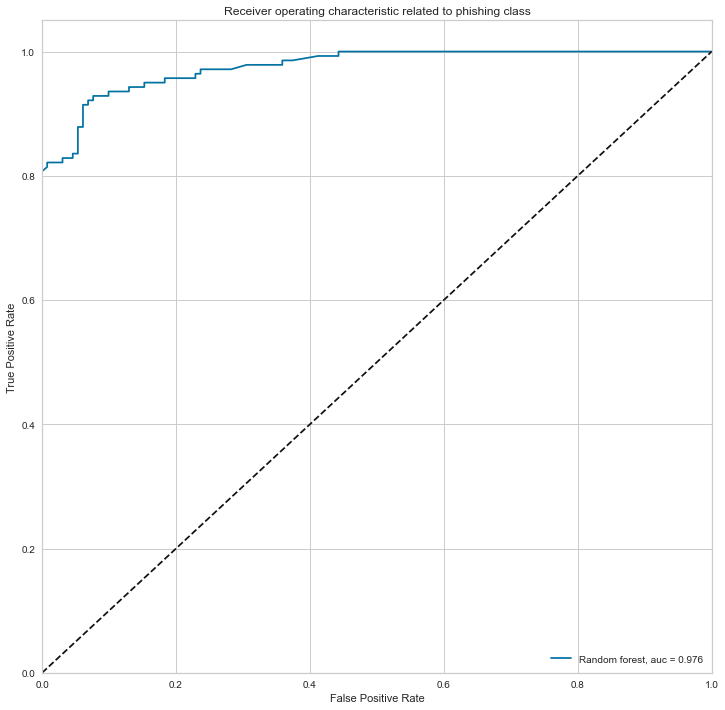

In [53]:
du.plot_multiclass_roc([fine_tuned_rf_clf], X_test, y_test, class_n=0, clf_n=1)

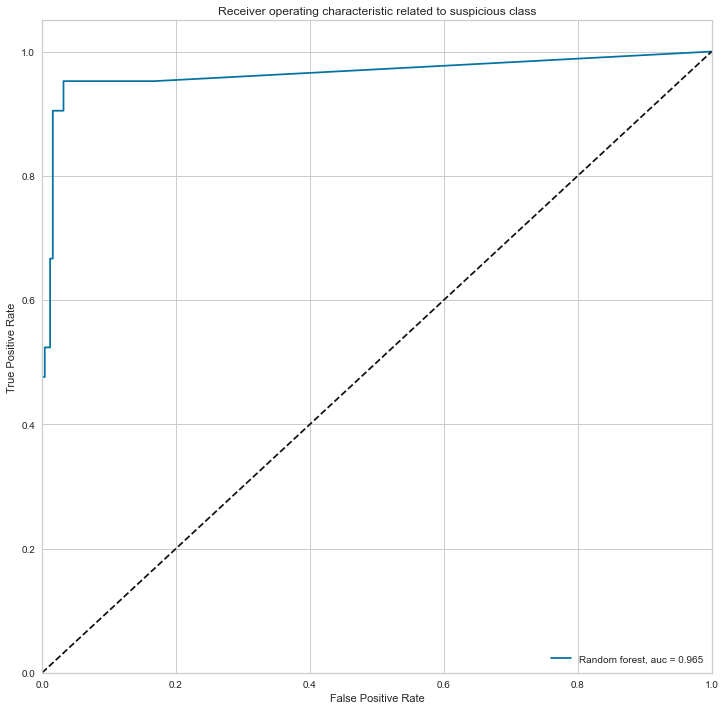

In [54]:
du.plot_multiclass_roc([fine_tuned_rf_clf], X_test, y_test, class_n=1, clf_n=1)

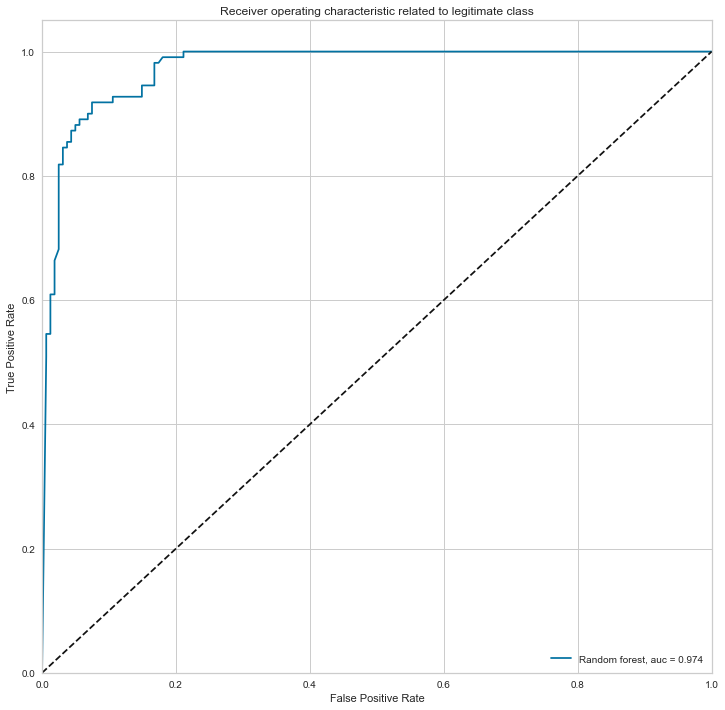

In [55]:
du.plot_multiclass_roc([fine_tuned_rf_clf], X_test, y_test, class_n=2, clf_n=1)

## Acurácia, Precision, recall e F<sub>1</sub> score.

In [56]:
from sklearn.model_selection import cross_val_score

rf_precision = precision_score(y_test, y_test_pred, average="weighted")
rf_recall = recall_score(y_test, y_test_pred, average="weighted")
rf_f1_score = f1_score(y_test, y_test_pred, average="weighted")
rf_accuracy = cross_val_score(fine_tuned_rf_clf, X_test, y_test, cv=3, scoring="accuracy")

du.print_metrics(rf_precision, rf_recall, rf_f1_score)

,0
Precision,0.901910
Recall,0.900369
F₁ score,0.900656


In [57]:
du.print_accuracy(rf_accuracy)

,0
1st folder,0.846154
2nd folder,0.833333
3rd folder,0.855556
